# t-SNE on MNIST dataset

t-sne is computationally heavy algorithm so we will run our t-sne on only 1000 datapoints out of 42000 datapoints.<br>
We know what MNIST dataset is. Just in case to remember what MNIST dataset is all about follow this link<br>
https://colah.github.io/posts/2014-10-Visualizing-MNIST/

In case you forgot what t-sne results shows us. How to interpret t-sne results follow this link:<br>
https://distill.pub/2016/misread-tsne/

To download the MNIST dataset from kaggle:
https://www.kaggle.com/c/digit-recognizer/data?select=train.csv<br>
Download train.csv of 73.22 MB

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing - Sampling and Standardization

In [2]:
d0 = pd.read_csv("MNIST_train.csv")
d0

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
d1 = d0.head(15000)
d1

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Sapareate Y and X
Y_15k = d1['label']
raw_X = d1.drop('label', axis=1)

print("Y:", Y_15k)
raw_X

Y: 0        1
1        0
2        1
3        4
4        0
        ..
14995    1
14996    4
14997    8
14998    9
14999    6
Name: label, Length: 15000, dtype: int64


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
X_15k = StandardScaler().fit_transform(raw_X)

print("Shape of X", X_15k.shape)
X_15k

Shape of X (15000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
print("Shape of Y", Y_15k.shape)
Y_15k

Shape of Y (15000,)


0        1
1        0
2        1
3        4
4        0
        ..
14995    1
14996    4
14997    8
14998    9
14999    6
Name: label, Length: 15000, dtype: int64

## importing TSNE model.

In [ ]:
from sklearn.manifold import TSNE

### Sampling for t-SNE

In [29]:
X = X_15k[0:1000, :]
Y = Y_15k.head(1000)

print("Y 1000:")
print(Y)
print()
print("Shape of X", X.shape)
X

Y 1000:
0      1
1      0
2      1
3      4
4      0
      ..
995    2
996    5
997    9
998    6
999    4
Name: label, Length: 1000, dtype: int64

Shape of X (1000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Performing TSNE on 1000 datapoints

In [30]:
# Now we have imported our TSNE model(class). We will initialize it with our costom vlaues.
# First we will give some parameter values to our model then we will pass our Matrix X in the model.

model = TSNE(n_components=2, random_state=0)
# n_components = 2 means we need 2 dimensions as our d_dash. d_dash < d.  Means We need 2D representation of 784d data.
# random_state = 0 means if we run our TSNE multiple times on same dataset we will not get slightly different results.

# There are some parameters which we havn't customised/configured.
# default perplexity = 30
# default step = 1000 itterations max
# defalut learning rate = 200

# Now we will pass our Matrix X
tsne_result = model.fit_transform(X)

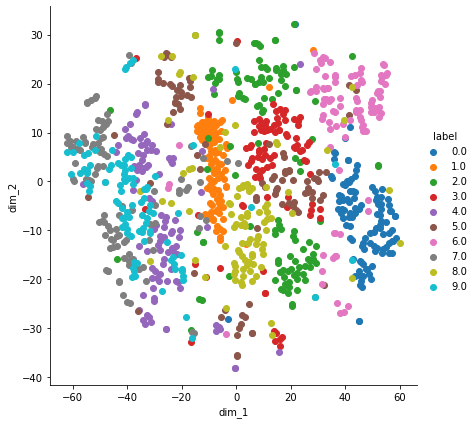

In [31]:
# preparing result for visualization

tsne_result = np.vstack((tsne_result.T, Y)).T   # combining X_dash and Y

# creating DataFrame to pass in Seaborn.
tsne_df = pd.DataFrame(data=tsne_result, columns=("dim_1", "dim_2", "label"))

# ploting the dataframe using seaborn scatter plot
sns.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'dim_1', "dim_2").add_legend()
plt.show()

### Perplexity = 50

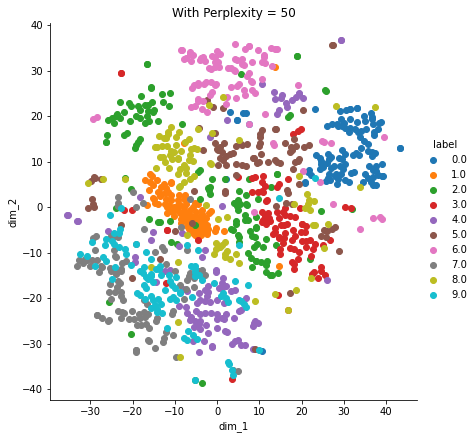

In [32]:
# Model configuratin
model_2 = TSNE(n_components=2, random_state=0, perplexity=50) # perplexity = 50
tsne_result = model_2.fit_transform(X)

# preparing for plotting
tsne_result = np.vstack((tsne_result.T, Y)).T
tsne_df = pd.DataFrame(data=tsne_result, columns=("dim_1", "dim_2", "label"))

# ploting
sns.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'dim_1', "dim_2").add_legend()
plt.title("With Perplexity = 50")
plt.show()

We can see our 2nd result is pretty much similer to perp=30 model. It is rotated also. But still they looks same.

### Perplexity=50 ans n_iter=5000

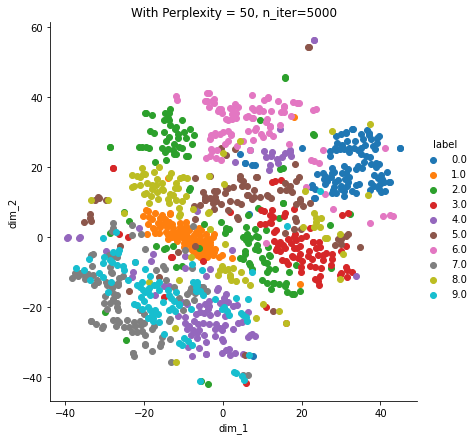

In [36]:
# n_iter = 5000 means step = 5000 
# Model configuratin
model_3 = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)     # perplexity=50,   n_iter=5000
tsne_result = model_3.fit_transform(X)

# preparing for plotting
tsne_result = np.vstack((tsne_result.T, Y)).T
tsne_df = pd.DataFrame(data=tsne_result, columns=("dim_1", "dim_2", "label"))

# ploting
sns.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'dim_1', "dim_2").add_legend()
plt.title("With Perplexity = 50, n_iter=5000")
plt.show()

Now after putting perp=50 constant in model2 and model3 and varying the step from 1000 to 5000. <br>
Results are pretty much same.<br>
Means our shape is stable now. So this can be considerd as final represenation of first 1000 points in 784d MNIST dataset<br>

These points are not well saparated as we can see in scatter plot.<br>
The reason is our small sample size. If we perform t-SNE on 42000 datapoints we will surely see some good saperation between all labels.<br>

To get a good idea about t-SNE with MNIST we should run t-SNE on 42k points in Google Colab. 

### Perplexity = 2,  n_iter = default

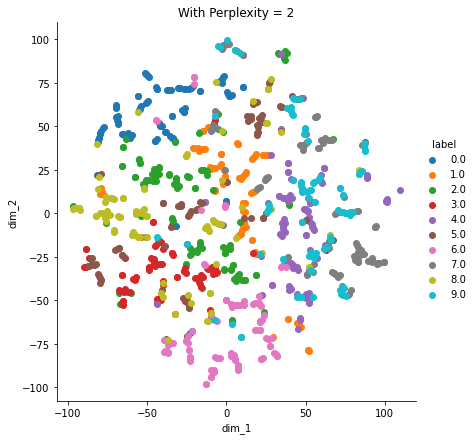

In [37]:
# Model configuratin
model_4 = TSNE(n_components=2, random_state=0, perplexity=2)     # perplexity=2,   n_iter=1000
tsne_result = model_4.fit_transform(X)

# preparing for plotting
tsne_result = np.vstack((tsne_result.T, Y)).T
tsne_df = pd.DataFrame(data=tsne_result, columns=("dim_1", "dim_2", "label"))

# ploting
sns.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'dim_1', "dim_2").add_legend()
plt.title("With Perplexity = 2")
plt.show()